**Imports**

In [556]:
import numpy as np
import matplotlib.pyplot as plt

**Creating a quadratic dataset with some noise**

In [557]:
np.random.seed(42)
num_datapoints = 200
X_train = 5 * np.random.randn(num_datapoints, 1)
X_train = np.clip(X_train, a_min= -10, a_max= 10)
y_train = (X_train**2) + 3*X_train + 16*np.random.randn(num_datapoints, 1)

**Plotting the dataset**

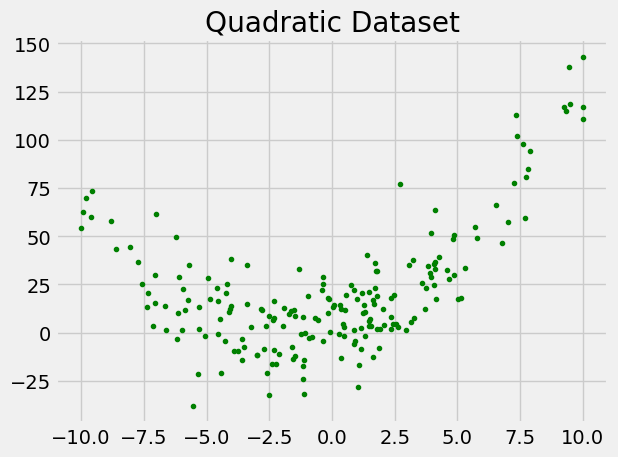

In [558]:
plt.plot(X_train, y_train, 'g.')
plt.title('Quadratic Dataset')
plt.grid(True)
plt.tight_layout()

**Training a linear regression model**

In [559]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Creating data samples to test the model**

In [560]:
X_test = np.linspace(-11, 11, 50)
X_test = X_test.reshape(50,1)

**Finally! Predictions :O**

In [561]:
predictions = lin_reg.predict(X_test)

**Taking a look at the predictions**

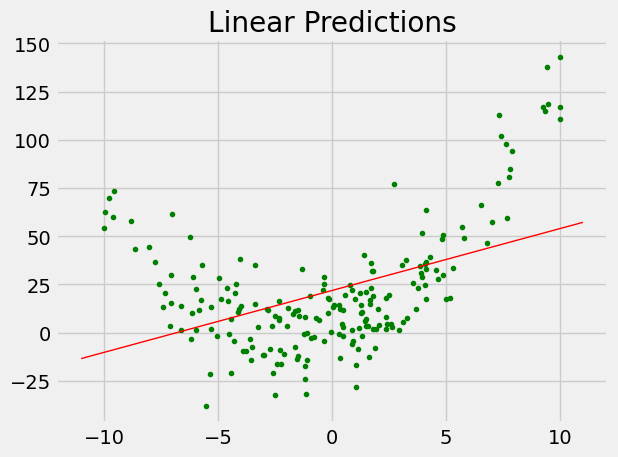

In [562]:
plt.plot(X_train, y_train, 'g.')
plt.plot(X_test, predictions, 'r-', linewidth = 1)
plt.title('Linear Predictions')
plt.grid(True)
plt.tight_layout()

**Well yeah, a straight line cannot possibly fit a quadratic function**

In [563]:
sample = X_test[0]
actual_val = sample**2 + 3*sample
print(f"prediction should have been : {actual_val}")
print(f"predicted value : {predictions[0]}")

prediction should have been : [88.]
predicted value : [-13.42947154]


**Evaluate the model using mean squared error, refer to sklearn docs**

**Lets try out polynomial regression**

In [564]:
from sklearn.preprocessing import PolynomialFeatures

poly_quad = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_quad.fit_transform(X_train)
X_test_poly = poly_quad.transform(X_test)

In [565]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [566]:
predictions_quadratic = poly_reg.predict(X_test_poly)

**Plot the predictions as approximated by our quadratic polynomial**

**Phew, that's better**

In [567]:
sample = X_test[0]
actual_val = sample**2 + 3*sample
print(f"prediction should have been : {actual_val}")
print(f"predicted value : {predictions_quadratic[0]}")

prediction should have been : [88.]
predicted value : [79.12314348]


**Evaluate these predictions and compare how they improve w.r.t linear regression**

**What would happen if we used a higher degree polynomial?**

In [568]:
poly_8 = PolynomialFeatures(degree=8, include_bias=False)
X_train_8 = poly_8.fit_transform(X_train)
X_test_8 = poly_8.transform(X_test)

In [569]:
poly_reg_8 = LinearRegression()
poly_reg_8.fit(X_train_8, y_train)

LinearRegression()

In [570]:
predictions_8 = poly_reg_8.predict(X_test_8)

**Oh no overfitting! The model fits the training dataset well but it will fail to generalize to new unseen data**

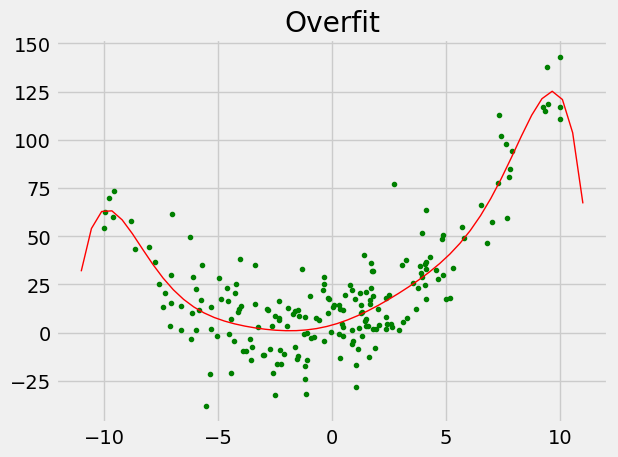

In [571]:
plt.plot(X_train, y_train, 'g.')
plt.plot(X_test, predictions_8, 'r-', linewidth = 1)
plt.title('Overfit')
plt.grid(True)
plt.tight_layout()

**Compare the errors of quadratic and 8th degree polynomial on the TEST data**

**Compare the errors of quadratic and 8th degree polynomial on the TRAIN data**

**Refer to sklearn docs and see if you can reduce overfitting by using regularization and still keeping an 8th degree polynomial**

In [572]:
from sklearn.linear_model import Lasso

**Create another dataset, this time using a cubic function**

**Fit a cubic polynomial to this new dataset**